In [2]:
#importing all the relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

In [3]:
#reading in the datset
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [4]:
#checking for the first few rows
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
#dropping the id column
df.drop('id',axis = 'columns',inplace = True)

In [93]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [6]:
#checking for the dimension of the dataset
df.shape

(5110, 11)

In [7]:
#getting a brief description abou the dataset
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [8]:
#checking for null values in the dataset
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [9]:
#dropping the null rows
df.dropna(axis = 'index',inplace = True)

In [98]:
df.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [99]:
df.shape

(4909, 11)

In [10]:
#finding the mean of the numerical columns
df.mean()

C:\Users\cance\AppData\Local\Temp\ipykernel_2936\2440193245.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean()


age                   42.865374
hypertension           0.091872
heart_disease          0.049501
avg_glucose_level    105.305150
bmi                   28.893237
stroke                 0.042575
dtype: float64

In [11]:
#finding the median of the numerical columns
df.median()

C:\Users\cance\AppData\Local\Temp\ipykernel_2936\389036874.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.median()


age                  44.00
hypertension          0.00
heart_disease         0.00
avg_glucose_level    91.68
bmi                  28.10
stroke                0.00
dtype: float64

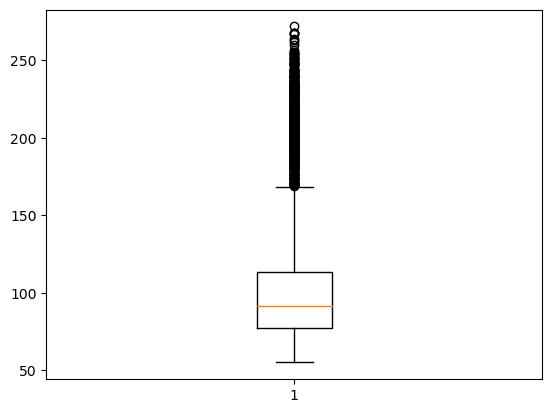

In [12]:
#doing a boxplot for the avg_glucose_level column to look at the outliers in the dataset
plt.boxplot(df.avg_glucose_level)
plt.show()

In [13]:
#calculating the the inter quartile range
q1 = np.quantile(df.avg_glucose_level,0.25)
q2 = np.quantile(df.avg_glucose_level,0.50)
q3 = np.quantile(df.avg_glucose_level,0.75)
IQR = q3-q1
print(IQR)

36.5


In [14]:
#setting the upper and lower whiskers
upper_lim = q3 + 1.5*IQR
lower_lim = q1 - 1.5*IQR

In [15]:
#removing the outliers
df = df[~((df.avg_glucose_level < lower_lim) | (df.avg_glucose_level > upper_lim))]

In [106]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
6,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
9,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1
10,Female,81.0,1,0,Yes,Private,Rural,80.43,29.7,never smoked,1


In [16]:
#checking the shape of the datset after removing outliers
df.shape

(4342, 11)

In [17]:
#resetting the index for the dataset
df.reset_index(inplace = True)

In [109]:
df.head()

,index,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
1,6,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
2,7,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
3,9,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1
4,10,Female,81.0,1,0,Yes,Private,Rural,80.43,29.7,never smoked,1


In [110]:
df.mean()

C:\Users\cance\AppData\Local\Temp\ipykernel_9264\3698961737.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean()


index                2608.851451
age                    40.605131
hypertension            0.069553
heart_disease           0.035928
avg_glucose_level      91.464767
bmi                    28.313128
stroke                  0.031322
dtype: float64

In [111]:
df.median()

C:\Users\cance\AppData\Local\Temp\ipykernel_9264\530051474.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.median()


index                2625.50
age                    41.00
hypertension            0.00
heart_disease           0.00
avg_glucose_level      87.98
bmi                    27.60
stroke                  0.00
dtype: float64

In [112]:
#defining the labels and features
X = df.drop('stroke', axis = 'columns')
y = df[['stroke']]

In [113]:
#dividing the features into categorical and numeric dataframe for rescaling of numeric and encoding of categoricl columns
X_cat = X.select_dtypes(exclude = np.number)
X_num = X.select_dtypes(include = np.number)

In [114]:
#performing minmaxxscaling of the categorical features
mms = MinMaxScaler()
X_num_scaled = mms.fit_transform(X_num)
X_num_scaled = pd.DataFrame(X_num_scaled)
X_num_scaled.columns = X_num.columns

In [115]:
X_num_scaled.head()

,index,age,hypertension,heart_disease,avg_glucose_level,bmi
0,0.000000,0.975586,0.0,1.0,0.449438,0.254296
1,0.000783,0.902344,1.0,1.0,0.132443,0.195876
2,0.000979,0.841309,0.0,0.0,0.347430,0.143184
3,0.001371,0.951172,0.0,0.0,0.030523,0.159221
4,0.001566,0.987793,1.0,0.0,0.223923,0.222222


In [116]:
#one hot encoding the categorical columns
X_cat_encoded = pd.get_dummies(X_cat, columns = ['gender', 'ever_married', 'work_type', 'Residence_type','smoking_status'], drop_first = True)

In [117]:
X_cat_encoded.head()

,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,0,1,0,1,0,0,0,0,1,0
1,1,0,1,0,1,0,0,0,0,1,0
2,0,0,0,0,1,0,0,1,0,1,0
3,0,0,1,0,1,0,0,1,0,0,0
4,0,0,1,0,1,0,0,0,0,1,0


In [118]:
#concatinating the preprocessed numerical and categorial features
X = pd.concat([X_cat_encoded,X_num_scaled], axis= 'columns')

In [119]:
X.head()

,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,index,age,hypertension,heart_disease,avg_glucose_level,bmi
0,1,0,1,0,1,0,0,0,0,1,0,0.000000,0.975586,0.0,1.0,0.449438,0.254296
1,1,0,1,0,1,0,0,0,0,1,0,0.000783,0.902344,1.0,1.0,0.132443,0.195876
2,0,0,0,0,1,0,0,1,0,1,0,0.000979,0.841309,0.0,0.0,0.347430,0.143184
3,0,0,1,0,1,0,0,1,0,0,0,0.001371,0.951172,0.0,0.0,0.030523,0.159221
4,0,0,1,0,1,0,0,0,0,1,0,0.001566,0.987793,1.0,0.0,0.223923,0.222222


In [120]:
y.head()

,stroke
0,1
1,1
2,1
3,1
4,1


In [121]:
from sklearn.metrics import accuracy_score

In [122]:
#splitting the features and labels into train and test
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

In [123]:
#instantitating the knn classifier algorithm
knn = KNeighborsClassifier(n_neighbors = 7)
model_knn = knn.fit(X,y)

C:\Users\cance\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [124]:
#calulating train accuracy
train_preds = model_knn.predict(X_train)
train_accuracy = accuracy_score(y_train,train_preds)
print(train_accuracy)

0.9740046067785456


C:\Users\cance\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [125]:
#calculating test accuracy
test_preds = model_knn.predict(X_test)
test_accuracy = accuracy_score(y_test,test_preds)
print(test_accuracy)

C:\Users\cance\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.9685341519570223


### LOGISTIC REGRESSION

In [126]:
#instantiating the logistic regression
lr = LogisticRegression()
model_lr = lr.fit(X,y)

C:\Users\cance\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [127]:
#calculating the train accuracy
train_preds_lr = model_lr.predict(X_train)
train_accuracy_lr = accuracy_score(y_train, train_preds_lr)
print(train_accuracy_lr)

0.9805857189865087


In [128]:
#calculatuing test accuracy
test_preds_lr = model_lr.predict(X_test)
test_accuracy_lr = accuracy_score(y_test, test_preds_lr)
print(test_accuracy_lr)

0.97544128933231


In [129]:
#instantiating and fit transforming the rfecv feature selection method
rfe = RFECV(estimator= lr, cv= 5)
X_train_selected = rfe.fit_transform(X_train, y_train)
print(rfe.n_features_) #getting the number of features giving us the best result
print(X_train_selected.shape) #shape of the slected train data

C:\Users\cance\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\cance\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\cance\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\cance\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\cance\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\cance\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\cance\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\cance\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\cance\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\cance\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\cance\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\cance\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

13
(3039, 13)


C:\Users\cance\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [130]:
support = rfe.support_
print(support)

[ True False False  True  True  True False  True  True  True False  True
  True  True  True  True  True]


In [131]:
#getting the name of the features output from RFECV fro best model performance
feature_names = X.columns
selected_features = [feature_names[i] for i in range(0,8) if support[i]]
print(selected_features)

['gender_Male', 'work_type_Never_worked', 'work_type_Private', 'work_type_Self-employed', 'Residence_type_Urban']


In [132]:
X_lr = X[['gender_Male', 'work_type_Never_worked', 'work_type_Private', 'work_type_Self-employed', 'Residence_type_Urban']]
y_lr = df[['stroke']]

In [133]:
X_lr_train, X_lr_test,y_lr_train, y_lr_test = train_test_split(X_lr, y_lr)

In [134]:
lrt = LogisticRegression()
model_lrt = lrt.fit(X_lr,y_lr)

C:\Users\cance\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [135]:
train_preds_lrt = model_lrt.predict(X_lr_train)
train_accuracy_lrt = accuracy_score(y_lr_train, train_preds_lrt)
print(train_accuracy_lrt)

0.9680589680589681


In [136]:
test_preds_lrt = model_lrt.predict(X_lr_test)
test_accuracy_lrt = accuracy_score(y_lr_test, test_preds_lrt)
print(test_accuracy_lrt)

0.9705340699815838


In [139]:
X.head()

,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,index,age,hypertension,heart_disease,avg_glucose_level,bmi
0,1,0,1,0,1,0,0,0,0,1,0,0.000000,0.975586,0.0,1.0,0.449438,0.254296
1,1,0,1,0,1,0,0,0,0,1,0,0.000783,0.902344,1.0,1.0,0.132443,0.195876
2,0,0,0,0,1,0,0,1,0,1,0,0.000979,0.841309,0.0,0.0,0.347430,0.143184
3,0,0,1,0,1,0,0,1,0,0,0,0.001371,0.951172,0.0,0.0,0.030523,0.159221
4,0,0,1,0,1,0,0,0,0,1,0,0.001566,0.987793,1.0,0.0,0.223923,0.222222


In [140]:
y.head()

,stroke
0,1
1,1
2,1
3,1
4,1


### Decision Tree Classifier

In [137]:
#instantiating decision tree classifier
dt = DecisionTreeClassifier(max_depth = 4)
model_dt = dt.fit(X,y)

In [138]:
#calculating train accuracy
train_predsdt = model_dt.predict(X_train)
train_accuracydt = accuracy_score(y_train, train_predsdt)
print(train_accuracydt)

1.0


In [88]:
#calculating test accuracy
test_predsdt = model_dt.predict(X_test)
test_accuracydt = accuracy_score(y_test, test_predsdt)
print(test_accuracydt)

1.0
